### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
%matplotlib inline

### As there are many columns, setting the options to show all columns

In [2]:
pd.set_option('display.max_columns', None)

### Reading in the file for 2007_2011, 2016-2018

In [3]:
accepted2007 = pd.read_csv("accepted_2007_2011.csv")

In [4]:
accepted2016 = pd.read_csv("accepted_2016_2018_individual.csv")

In [5]:
accepted2007.set_index("id", inplace=True)

In [6]:
accepted2016.set_index("id", inplace=True)

### Selecting the columns that have low variance and the columns that are relevant for after receiving the loan and not in the loan grading. Splitting the data into pre loan and after loan dataframes

In [7]:
drop_no_var2007 = ["hardship_flag", "disbursement_method", "tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
"policy_code", "collections_12_mths_ex_med", "out_prncp", "out_prncp_inv", "pub_rec", "desc", "loan_status", "initial_list_status"]

In [8]:
drop_no_var2016 = ["hardship_flag", "chargeoff_within_12_mths", "application_type", "policy_code", "out_prncp",
               "pymnt_plan"]

In [9]:
post_loan_list2007 = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment"]

In [10]:
post_loan_list2016 = ["loan_status", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment", 
                  "disbursement_method", "hardship_flag"]

In [11]:
accepted2007.drop((drop_no_var2007+post_loan_list2007), axis=1, inplace = True)

In [12]:
accepted2016.drop((drop_no_var2016+post_loan_list2016), axis=1, inplace = True)

### Analyzing the pre-loan dataset

In [13]:
accepted2007.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate grade  \
id                                                                             
1077501     5000.0       5000.0           4975.0   36 months     10.65     B   
1077430     2500.0       2500.0           2500.0   60 months     15.27     C   
1077175     2400.0       2400.0           2400.0   36 months     15.96     C   
1076863    10000.0      10000.0          10000.0   36 months     13.49     C   
1075358     3000.0       3000.0           3000.0   60 months     12.69     B   

        sub_grade                 emp_title emp_length home_ownership  \
id                                                                      
1077501        B2                     other  10+ years           RENT   
1077430        C4                     Ryder   < 1 year           RENT   
1077175        C5                     other  10+ years           RENT   
1076863        C1       AIR RESOURCES BOARD  10+ years           RENT   
1075358        B5  University Medical Group     1 year           RENT   

         annual_inc verification_status     issue_d pymnt_plan  \
id                                                               
1077501     24000.0            Verified  2011-12-01          n   
1077430     30000.0     Source Verified  2011-12-01          n   
1077175     12252.0        Not Verified  2011-12-01          n   
1076863     49200.0     Source Verified  2011-12-01          n   
1075358     80000.0     Source Verified  2011-12-01          n   

                purpose                 title addr_state    dti  delinq_2yrs  \
id                                                                             
1077501     credit_card              Computer         AZ  27.65          0.0   
1077430             car                  bike         GA   1.00          0.0   
1077175  small_business  real estate business         IL   8.72          0.0   
1076863           other              personel         CA  20.00          0.0   
1075358           other              Personal         OR  17.94          0.0   

        earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
id                                                                          
1077501       1985-01-01           735.0            739.0             1.0   
1077430       1999-04-01           740.0            744.0             5.0   
1077175       2001-11-01           735.0            739.0             2.0   
1076863       1996-02-01           690.0            694.0             1.0   
1075358       1996-01-01           695.0            699.0             0.0   

         open_acc  revol_bal  revol_util  total_acc  pub_rec_bankruptcies  
id                                                                         
1077501       3.0    13648.0        83.7        9.0                   0.0  
1077430       3.0     1687.0         9.4        4.0                   0.0  
1077175       2.0     2956.0        98.5       10.0                   0.0  
1076863      10.0     5598.0        21.0       37.0                   0.0  
1075358      15.0    27783.0        53.9       38.0                   0.0

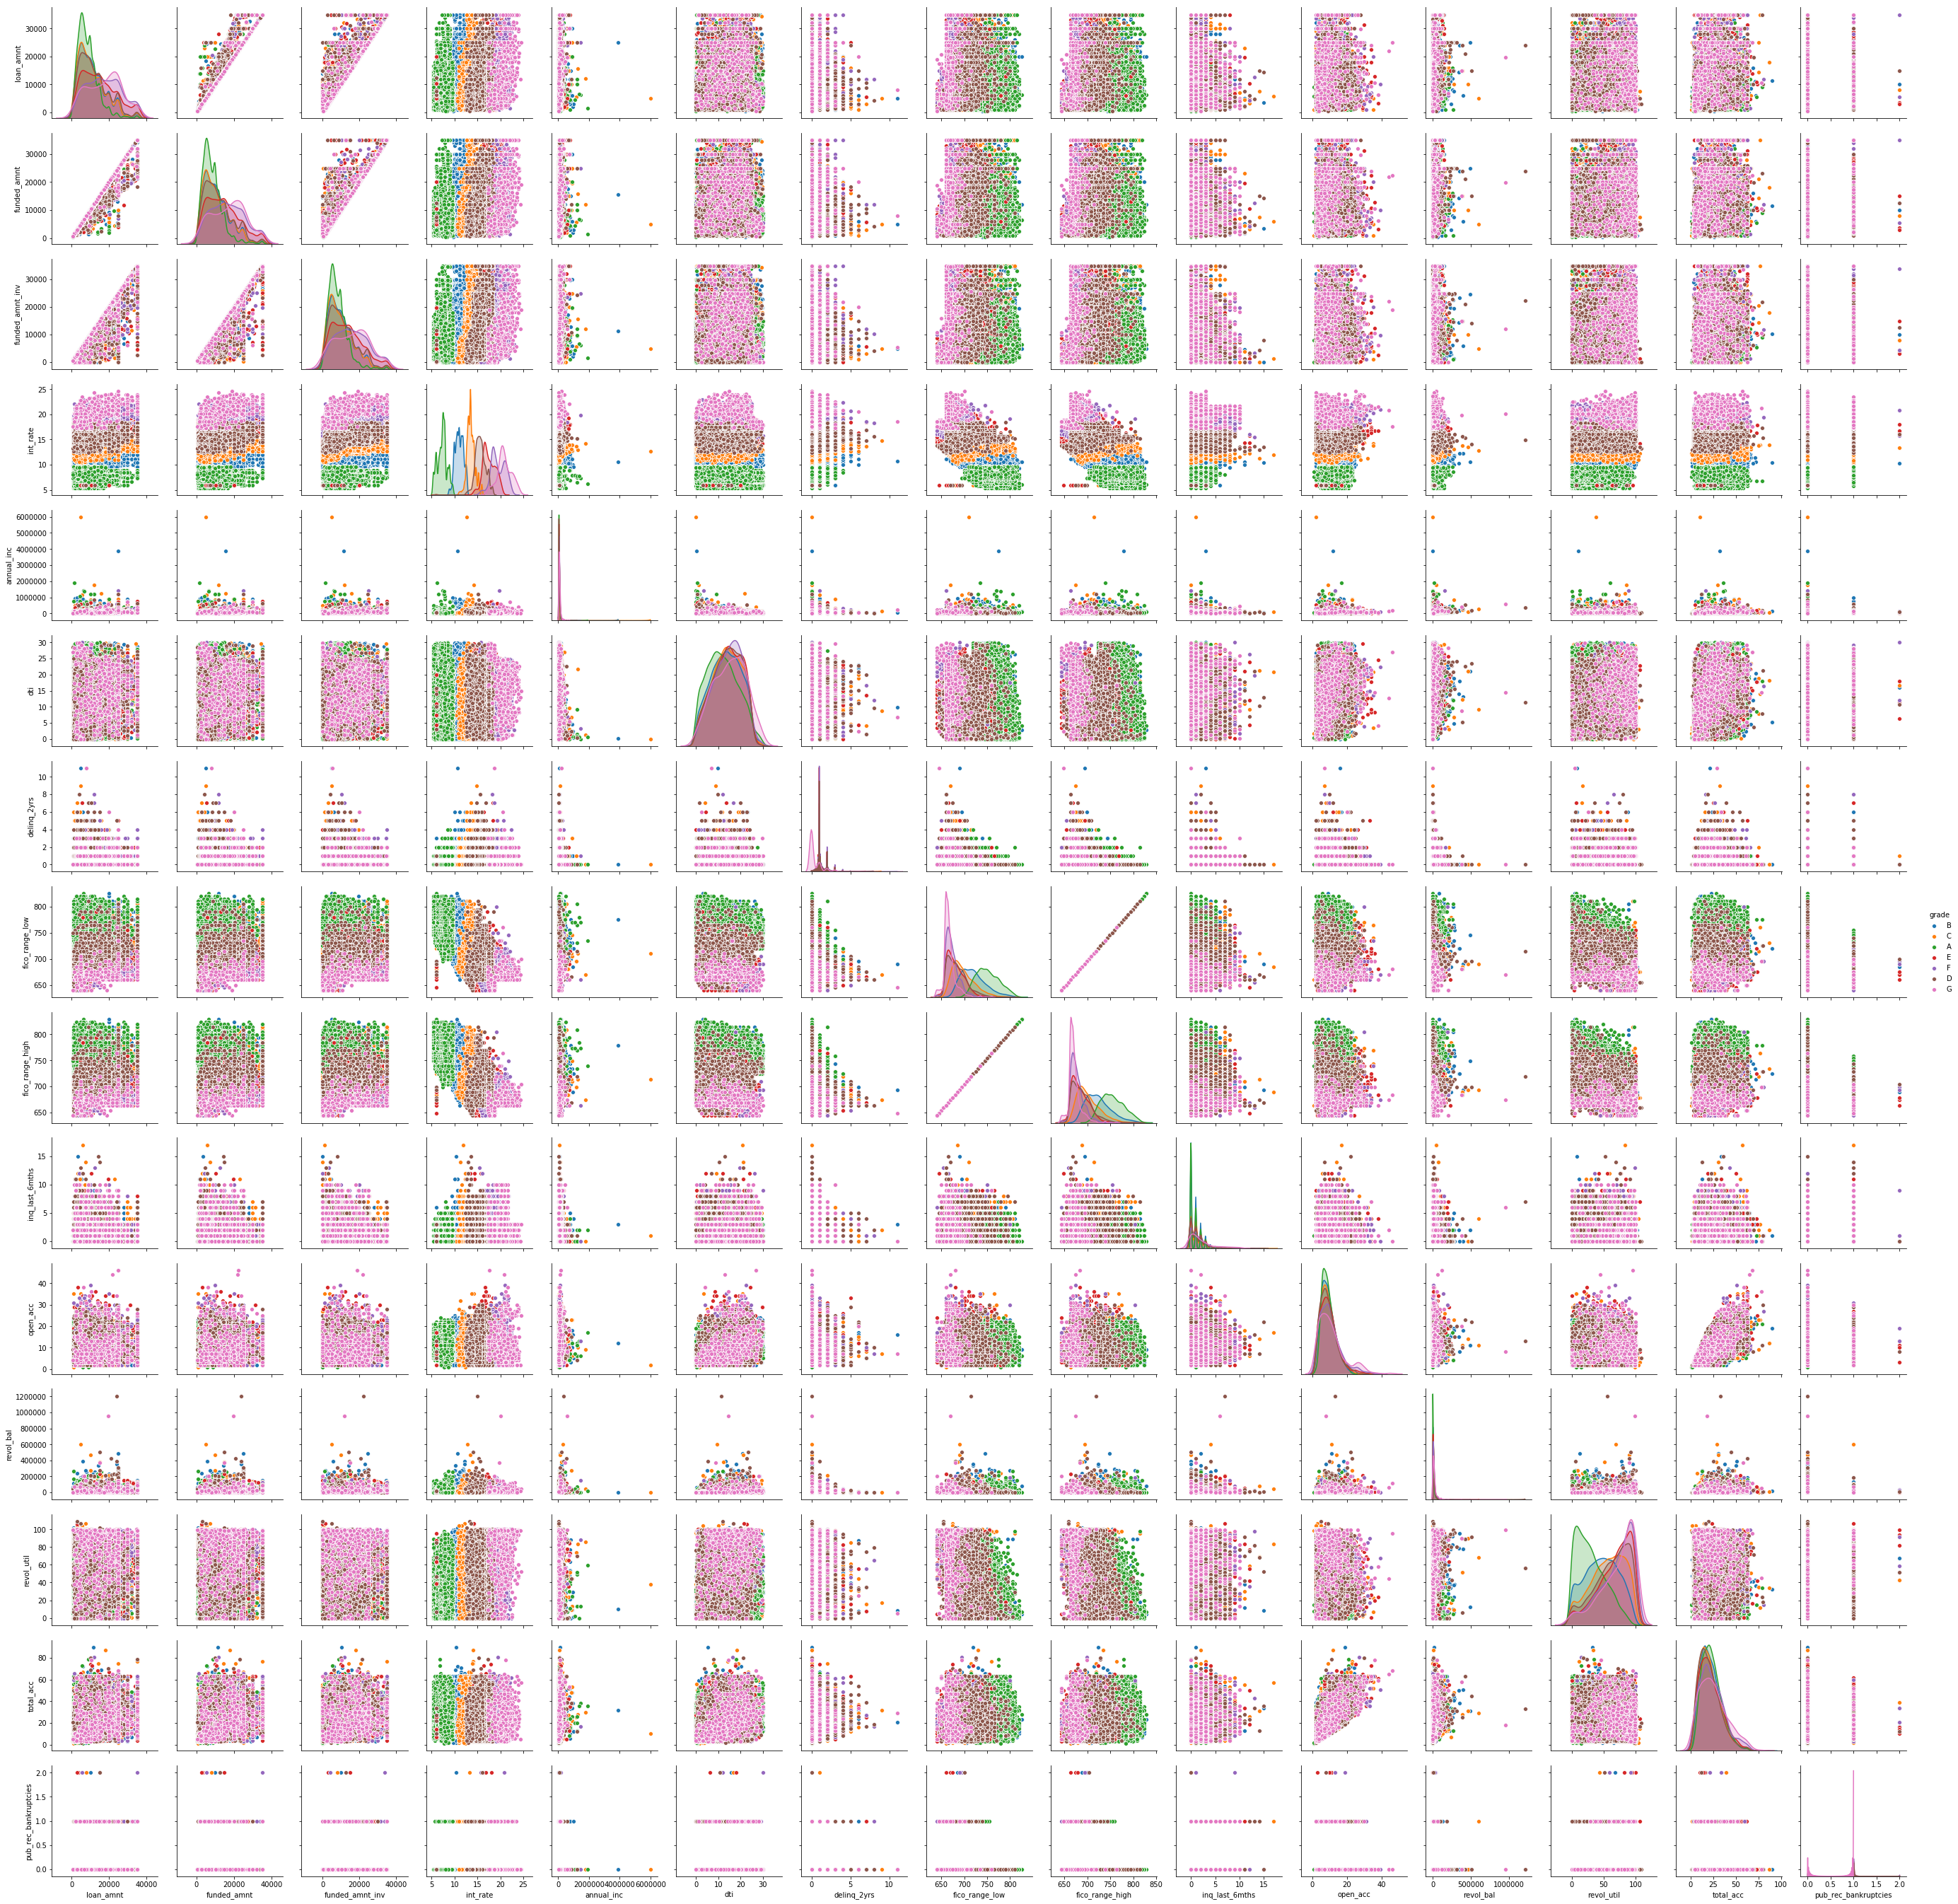

In [548]:
sns.pairplot(accepted2007, hue="grade")

### Loans issued by LoanClub

#### 1. Loans by purpose

In [14]:
verified_grade2007 = pd.crosstab(index=accepted2007["grade"], 
                          columns=accepted2007["purpose"])

In [15]:
verified_grade2016 = pd.crosstab(index=accepted2016["grade"], 
                          columns=accepted2016["purpose"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

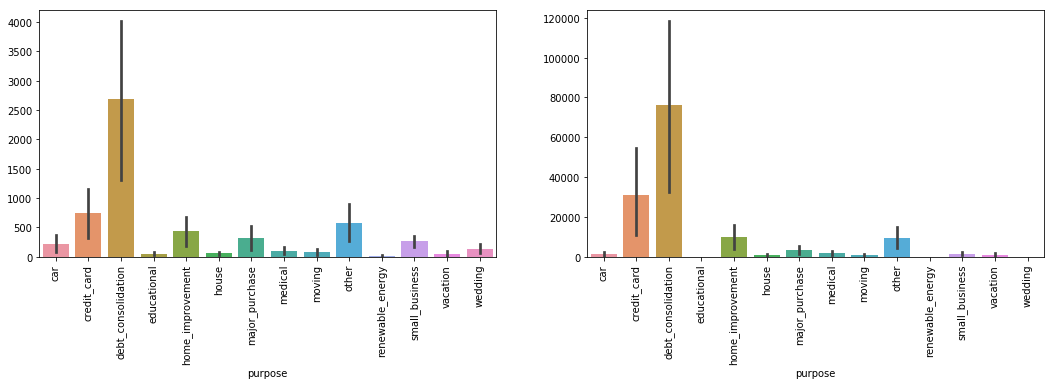

In [34]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.barplot(data = verified_grade2007)
plt.xticks(rotation=90)

#verified_grade2007.plot(kind="bar", stacked=True)
ax1 = plt.subplot2grid((2,2),(0,1))
sns.barplot(data = verified_grade2016)
plt.xticks(rotation=90)

#verified_grade2016.plot(kind="bar", stacked=True)

Commentary: The most comon purpose is debt consolidation, followed by credit cards (which in a way can also qualify as debt consolidation), and home improvement loans throughout both periods. 
It looks like as a proportion less loans are being asked for weddings and educational purposes

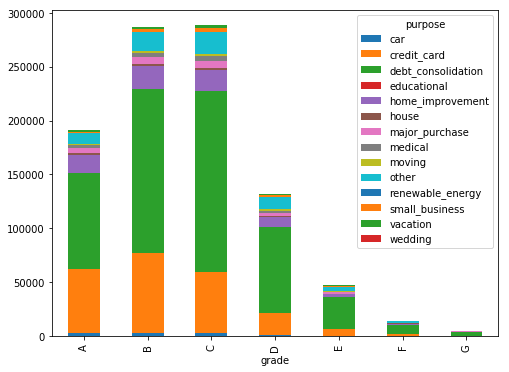

In [17]:
verified_grade2016.plot(kind="bar", 
                 figsize=(8,6),
                 stacked=True)

Commentary: The most comon purpose stayed the same in this period. But it looks like less loans are being asked for weddings  

#### 3. Loans by grade

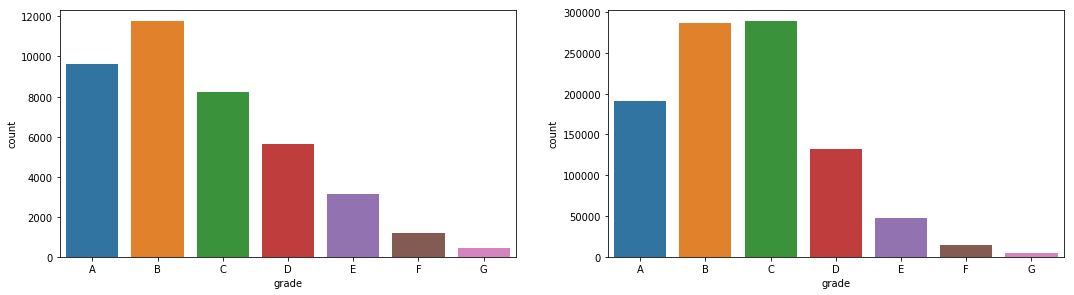

In [23]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(x = "grade", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(x = "grade", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

Commentary: As expected more loans get issued for the higher (safer) loan grade and decreses a lot for more risky ones

#### 4. Loands by term

([<matplotlib.patches.Wedge at 0x1186f2438>,
 [Text(-0.7073424283215655, 0.8424171704661244, '36 months'),
  Text(0.707342349448774, -0.8424172366922987, '60 months')],
 [Text(-0.38582314272085383, 0.4595002747997042, '72%'),
  Text(0.38582309969933126, -0.459500310923072, '28%')])

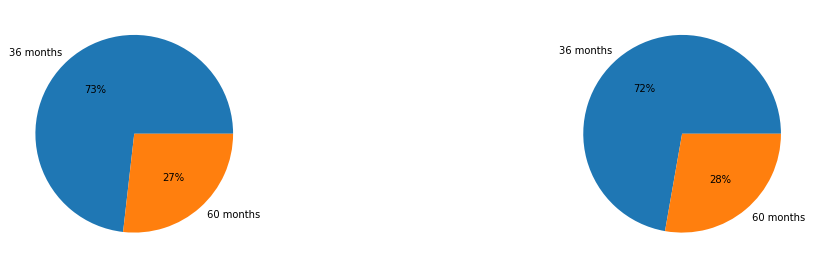

In [25]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(accepted2007["term"].value_counts(), labels = ["36 months", "60 months"], autopct='%1.0f%%')
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(accepted2016["term"].value_counts(), labels = ["36 months", "60 months"], autopct='%1.0f%%')

Structure of the length of loans stayed similar when compared to 2007-2011 a little over 1/4 of loans being 60 months while 3/4 36 months

#### 5. Loans by home ownership

([<matplotlib.patches.Wedge at 0x11cafa710>,
 [Text(0.02600014442369453, 1.0996926809295164, 'Rent'),
  Text(-0.40989083729951753, -1.020778870029107, 'Mortgage'),
  Text(1.029348118247712, -0.3878691164038386, 'Own'),
  Text(1.0999974427785835, -0.002371893879815553, 'Other')],
 [Text(0.014181896958378832, 0.5998323714160998, '49%'),
  Text(-0.22357682034519136, -0.5567884745613311, '39%'),
  Text(0.5614626099532973, -0.21156497258391194, '11%'),
  Text(0.5999986051519546, -0.0012937602980812105, '0%')])

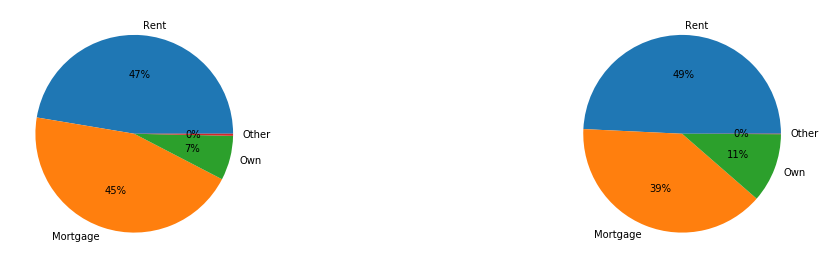

In [35]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(accepted2007["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"], autopct='%1.0f%%')
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(accepted2016["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"], autopct='%1.0f%%')

Home ownership changed a little with more people asking for loans who owned a house  (7% vs 11%) as compare to the ones that had mortgage (45% vs 39%)

#### 6. Loans by employment length

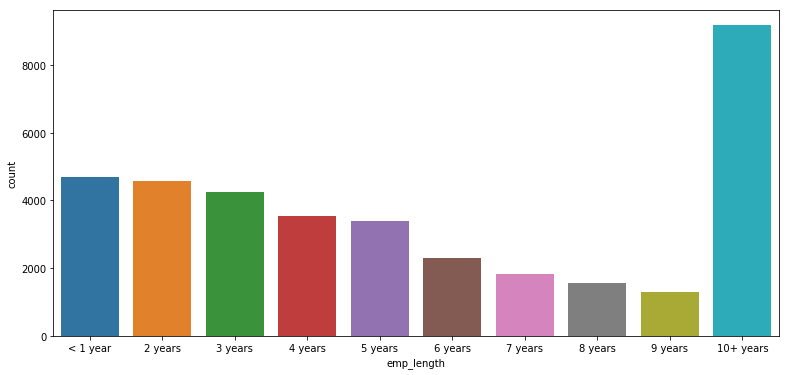

In [36]:
plt.figure(figsize=(13, 6))
sns.countplot(x="emp_length", order = ["< 1 year", "2 years", "3 years", "4 years", "5 years", "6 years",
                                       "7 years", "8 years", "9 years", "10+ years"], data=accepted2007)

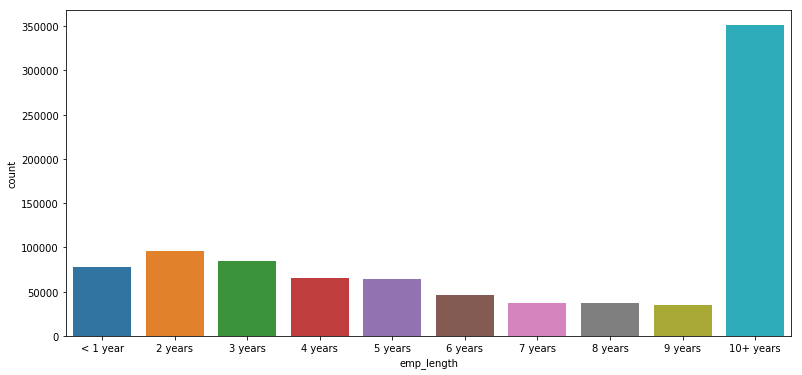

In [37]:
plt.figure(figsize=(13, 6))
sns.countplot(x="emp_length", order = ["< 1 year", "2 years", "3 years", "4 years", "5 years", "6 years",
                                       "7 years", "8 years", "9 years", "10+ years"], data=accepted2016)

Most of the people asking for loans have been employed for more than 10 years

#### 7. Correlation matrix

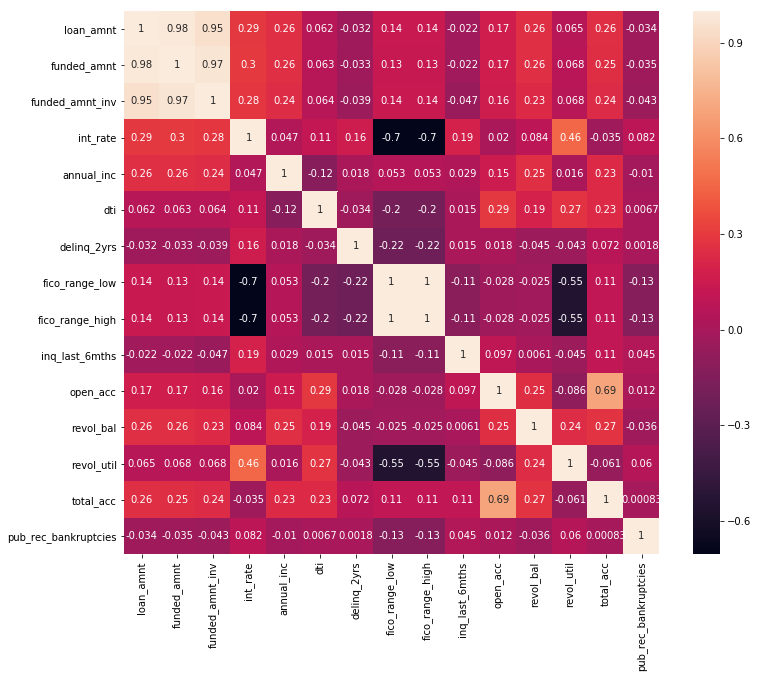

In [520]:
plt.figure(figsize=(12,10))
sns.heatmap(pre_loan_df.corr(), annot = True)

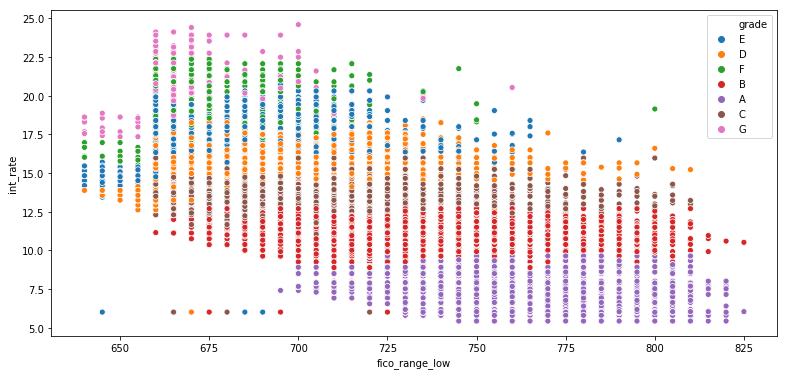

In [522]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="fico_range_low", y="int_rate", hue="grade", data=accepted2016)

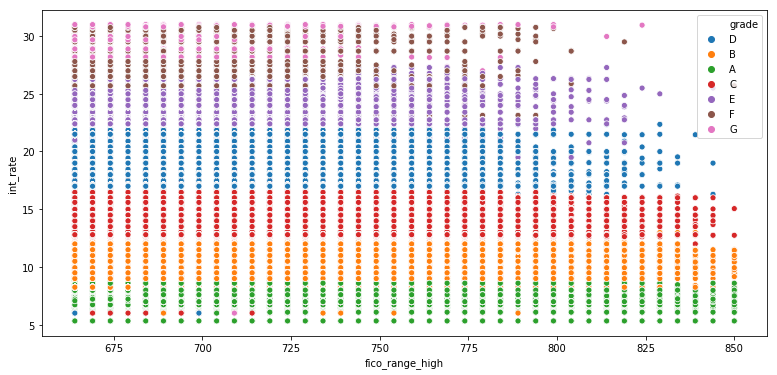

In [38]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="fico_range_high", y="int_rate", hue="grade", estimator="mean", data=accepted2016)

fico score seems to have lower effect on loan grade compared to the 2007-2011 where relationship appeared to be much stronger. Higher fico score means better credit rating

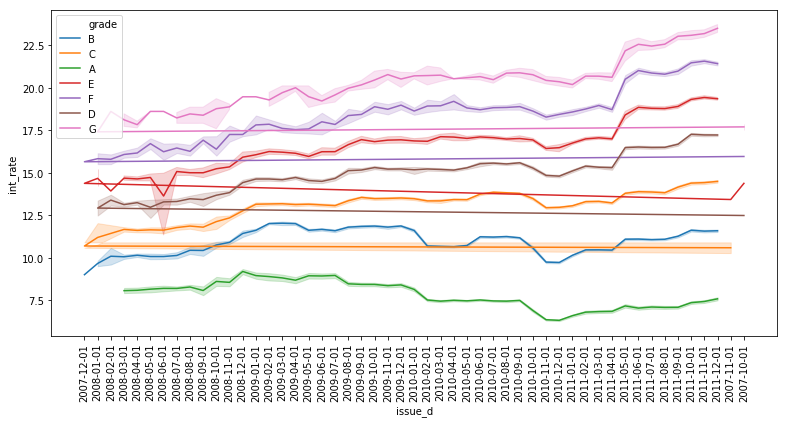

In [48]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="int_rate", hue = "grade", estimator = "mean", data = accepted2007)
plt.xticks(rotation=90)
plt.show()

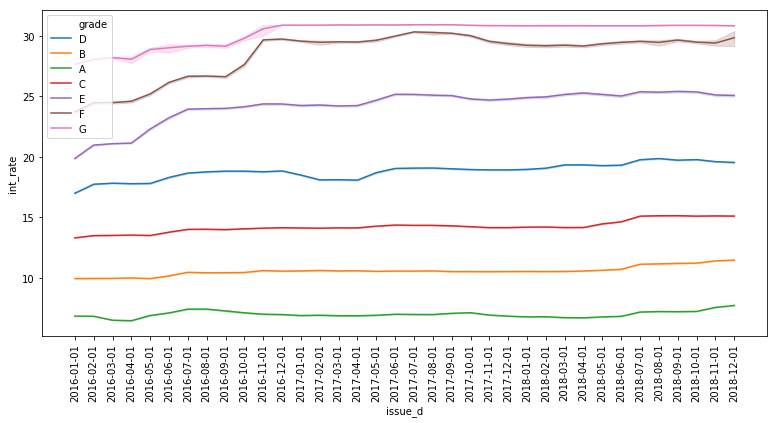

In [49]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="int_rate", hue = "grade", data =accepted2016)
plt.xticks(rotation=90)
plt.show()

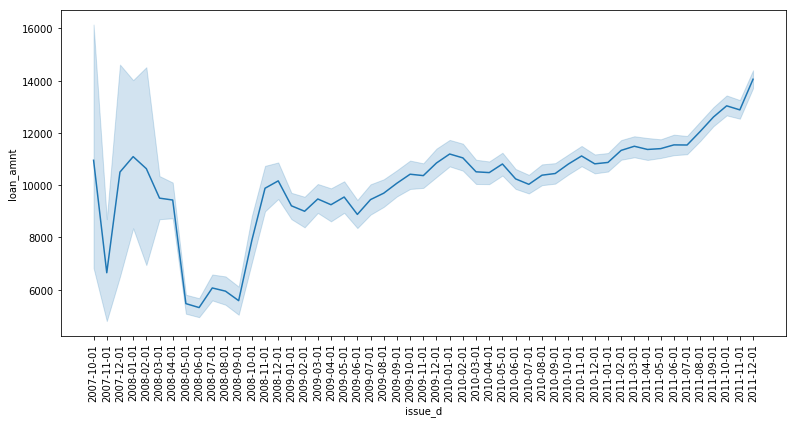

In [42]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="loan_amnt", estimator = "mean", data = accepted2007)
plt.xticks(rotation=90)
plt.show()

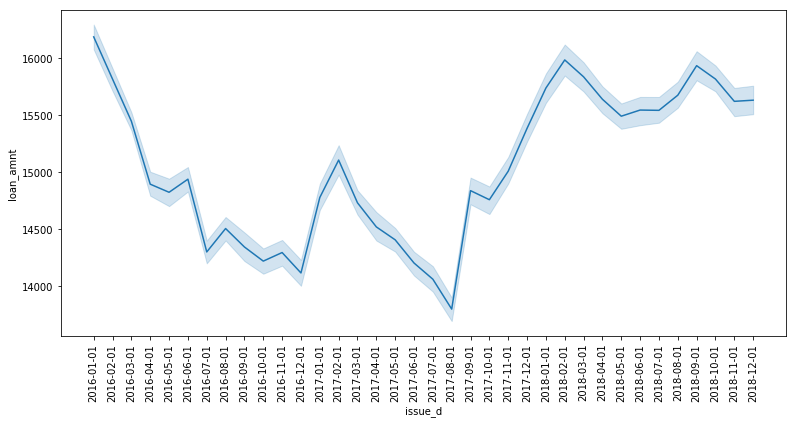

In [43]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="loan_amnt", estimator = "mean", data = accepted2016)
plt.xticks(rotation=90)
plt.show()

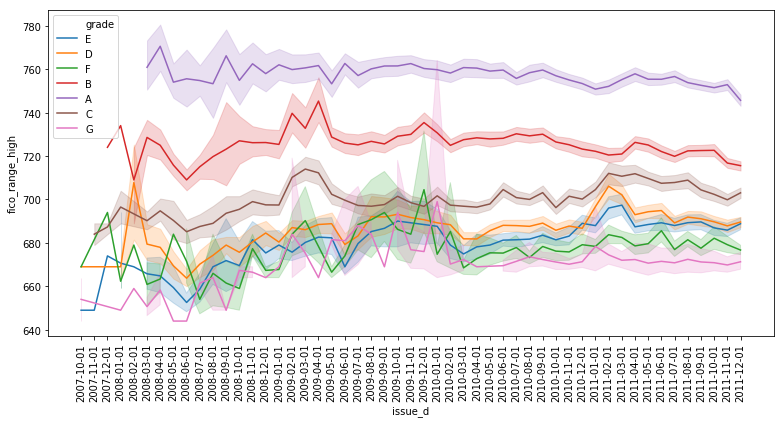

In [519]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="fico_range_high", hue = "grade", estimator = "mean", data = pre_loan_df)
plt.xticks(rotation=90)
plt.show()

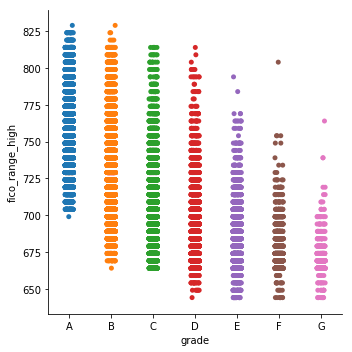

In [45]:
sns.catplot(x="grade", y="fico_range_high", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)

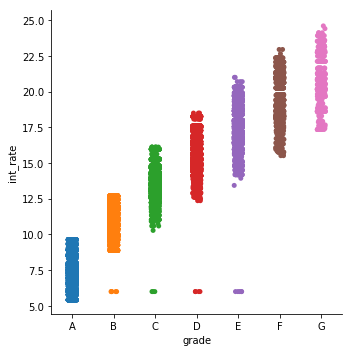

In [46]:
sns.catplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)

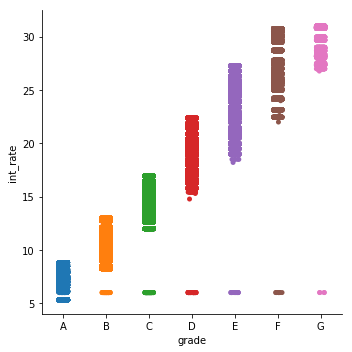

In [47]:
sns.catplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

The Loan Grade and interest rate have a strong relationship. As the loans that are percieved as safer get the better conditions

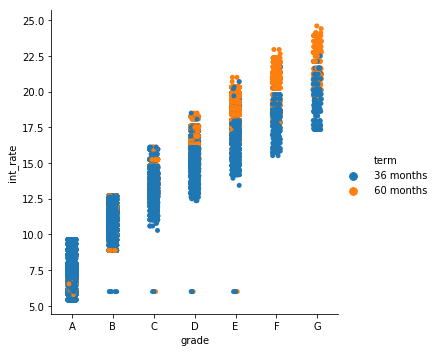

In [40]:
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)

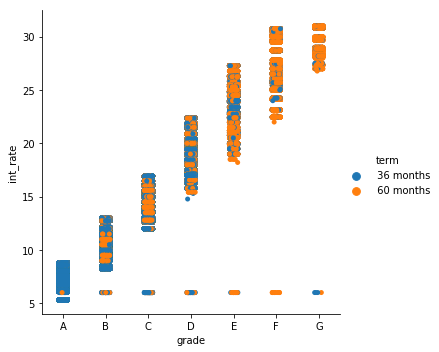

In [41]:
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

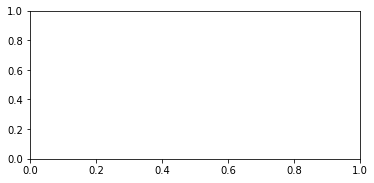

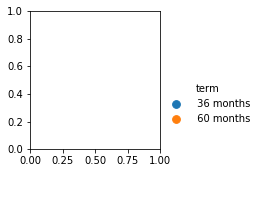

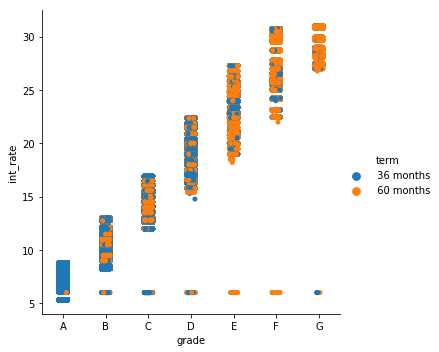

In [39]:
plt.figure(figsize=(13, 6))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
ax1 = plt.subplot2grid((2,2),(0,1))
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

### Decision tree training

In [437]:
from sklearn.tree import DecisionTreeClassifier
grade_class = DecisionTreeClassifier(random_state=0, max_depth = 10)

In [484]:
Xtrain = pre_loan_with_dummies
ytrain = loans_desc["grade"]

In [333]:
pre_loan_with_dummies = pd.get_dummies(pre_loan_df_dummies)

In [332]:
pre_loan_df_dummies = pre_loan_df.drop(["sub_grade", "emp_title", "title", "addr_state", "earliest_cr_line", 
                                        "issue_d", "grade"], axis = 1)

In [438]:
grade_class.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Cross validation

In [439]:
from sklearn.model_selection import cross_val_score

In [440]:
cv = cross_val_score(DecisionTreeClassifier(random_state=0, max_depth = 10),Xtrain, ytrain,cv=20)

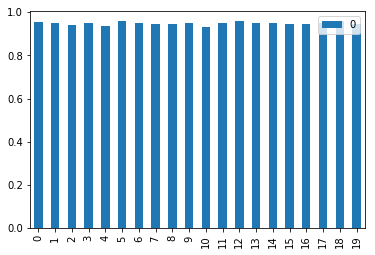

In [441]:
pd.DataFrame(cv).plot(kind="bar")

In [442]:
np.mean(cv)

0.9493408885471529

### Calculation test score

In [313]:
from sklearn.model_selection import train_test_split

loans = accepted.drop('grade',axis=1)
grade = accepted['grade']
sub_grade = accepted["sub_grade"]
loans_train, loans_test, grade_train, grade_test = train_test_split(loans, grade, test_size=0.2, random_state=42)

In [337]:
drop_list_obj = ["sub_grade", "emp_title", "title", "addr_state", "earliest_cr_line", 
                 "issue_d"]

In [338]:
loans_test.drop((drop_no_var + post_loan_list + drop_list_obj), axis =1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [339]:
loans_test_with_dummies = pd.get_dummies(loans_test)

In [340]:
grade_class.score(loans_test_with_dummies, grade_test)

0.9645

### Confusion matrix

In [341]:
from sklearn.metrics import confusion_matrix, classification_report

In [343]:
y_pred = grade_class.predict(loans_test_with_dummies)

In [344]:
confusion_matrix(grade_test,y_pred)

array([[1961,    6,    0,    0,    0,    0,    0],
       [   4, 2328,   24,    0,    0,    0,    0],
       [   0,   18, 1576,   15,    1,    0,    0],
       [   0,    1,   11, 1081,   43,   13,    0],
       [   0,    1,    2,   38,  541,   24,    7],
       [   0,    0,    1,   10,   33,  163,   17],
       [   0,    0,    0,    0,    5,   10,   66]])

In [345]:
print(classification_report(grade_test,y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1967
           B       0.99      0.99      0.99      2356
           C       0.98      0.98      0.98      1610
           D       0.94      0.94      0.94      1149
           E       0.87      0.88      0.88       613
           F       0.78      0.73      0.75       224
           G       0.73      0.81      0.77        81

   micro avg       0.96      0.96      0.96      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.96      0.96      0.96      8000



### Random forest

In [461]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [489]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(Xtrain, ytrain)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)




[1.97457849e-02 2.41519861e-02 2.29141638e-02 5.20240039e-01
 5.91039269e-03 7.07598782e-03 2.58742596e-03 1.17382188e-01
 1.20675411e-01 1.43859324e-02 1.23172673e-02 7.79411871e-03
 3.23104403e-02 8.06904396e-03 7.03833096e-04 3.17775440e-02
 3.25677519e-02 6.24125067e-04 6.81430615e-04 5.60931147e-04
 5.58535279e-04 5.40968030e-04 4.68211671e-04 4.36449039e-04
 3.60155986e-04 4.04711393e-04 3.49123275e-04 6.23674979e-04
 1.16659345e-03 1.34032326e-04 4.63415894e-04 1.15063888e-03
 2.28824802e-03 8.15317218e-04 1.74748676e-03 0.00000000e+00
 4.62796709e-04 5.55659992e-04 1.02187568e-03 2.31480436e-04
 4.83684656e-04 2.19651897e-04 3.19246557e-04 2.18352991e-04
 1.95860188e-04 5.52308446e-04 6.72468448e-05 1.38199483e-03
 1.11974018e-04 1.94507077e-04]


In [490]:
clf.score(loans_test_with_dummies, grade_test)

0.8645